# Problem Statement:

Identify which questions asked on Quora are duplicates of questions that have already been asked.

This can be helpful for providing instant responses to questions that have already been addressed.

# Objective:

The goal of this project is to predict which of the provided pairs of questions contain two questions with the same meaning.

# Real World/Business Objectives and Constraints:

The cost of a mis-classification can be very high.
You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
No strict latency concerns.
Interpretability is partially important.

# About Dataset

The dataset "Train.csv" contains 404,290 rowsand 5 columns

Data fields
id - the id of a training set question pair

qid1, qid2 - unique ids of each question (only available in train.csv)

question1, question2 - the full text of each question

is_duplicate - is the dependent variable, and the target variable is set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

Install and import necessary libraries and modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
import nltk
#used for performing lemmatization
from nltk.stem import WordNetLemmatizer 
#used to remove repeating words like- of,we,the,them etc
from nltk.corpus import stopwords

In [4]:
#load the dataset

In [5]:
df = pd.read_csv('train.csv')


In [6]:
df = df.fillna('')

In [7]:
y = df.pop('is_duplicate')
x = df

In [8]:
y.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [9]:
pip install imblearn --user

In [10]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(x, y)

In [11]:
y_ros.value_counts()

0    255027
1    255027
Name: is_duplicate, dtype: int64

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

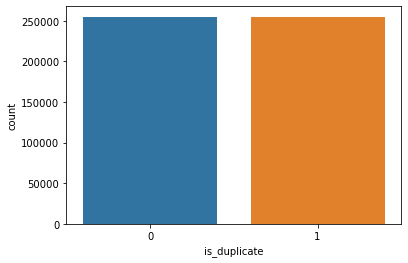

In [12]:
sns.countplot(y_ros)

In [13]:
y_ros.shape

(510054,)

In [14]:
df['is_duplicate']=y_ros

In [15]:
#fill null values with ''

In [16]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
#Taking only 3000 sample data

In [18]:
new_df = df.sample(3000,random_state=2)

In [19]:
#Exploring the dataset

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [21]:
#Taking independent features and dependent features seperately

In [22]:
ques_df_basic = new_df[['question1','question2']]
ques_df_basic.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [23]:
final_df_basic = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df_basic.shape)
final_df_basic.head()

(3000, 1)


,is_duplicate
398782,1
115086,0
327711,0
367788,0
151235,0


In [24]:
final_df_basic.isnull().sum()

is_duplicate    0
dtype: int64

In [25]:
#Performing bag of words 

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions_basic = list(ques_df_basic['question1']) + list(ques_df_basic['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr_basic, q2_arr_basic = np.vsplit(cv.fit_transform(questions_basic).toarray(),2)

In [27]:
temp_df1_basic = pd.DataFrame(q1_arr_basic, index= ques_df_basic.index)
temp_df2_basic = pd.DataFrame(q2_arr_basic, index= ques_df_basic.index)
temp_df_basic = pd.concat([temp_df1_basic, temp_df2_basic], axis=1)
temp_df_basic.shape

(3000, 6000)

In [28]:
final_df_basic = pd.concat([final_df_basic, temp_df_basic], axis=1)
print(final_df_basic.shape)
final_df_basic.head()

(3000, 6001)


,is_duplicate,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#using sklearn to solit train and test data

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df_basic.iloc[:,1:].values,final_df_basic.iloc[:,0].values,test_size=0.2,random_state=1)

In [31]:
#Random classifier on basic data

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.69

In [33]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.69
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       385
           1       0.64      0.30      0.41       215

    accuracy                           0.69       600
   macro avg       0.67      0.60      0.60       600
weighted avg       0.68      0.69      0.65       600



In [34]:
#Xg boost on basic dataset

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.685

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[349,  36],
       [150,  65]], dtype=int64)

In [38]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[320,  65],
       [124,  91]], dtype=int64)

In [39]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

Text preprocessing
Basic Data Cleaning
Perform below actions on question1 and question2 columns of the datset:

Remove html tags
Remove Stopwords
Expand Contractions
Remove Punctuations
Convert entire text to lowercase
Remove Special Characters

In [40]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dhanamjaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhanamjaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhanamjaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    
    # POS tagger dictionary
    pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
    def token_stop_pos(text):
        tags = pos_tag(word_tokenize(text))
        newlist = []
        for word, tag in tags:
            if word.lower() not in set(stopwords.words('english')):
                newlist.append(tuple([word, pos_dict.get(tag[0])]))
        return newlist

    q=token_stop_pos(q)
    def lemmatize(pos_data):
        lemma_rew = " "
        for word, pos in pos_data:
            if not pos:
                lemma = word
                lemma_rew = lemma_rew + " " + lemma
            else:
                lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
                lemma_rew = lemma_rew + " " + lemma
        return lemma_rew
    
    q=lemmatize(q)
    
    
    
    
    
    
    
   
    #tokenized_text = sent_tokenize(q)
    #for n in tokenized_text:
     #   wordsList = nltk.word_tokenize(n)
    #wordsList = [w for w in wordsList if not w in stop_words]
    
    
    #q = nltk.pos_tag(wordsList)
    #print(tagged_words)
    
    #lemmatizer = WordNetLemmatizer()
    #q = lemmatizer.lemmatize(q)

    
    return q

In [42]:
#new_df=df

In [43]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [44]:
#Adding some features(Feature engineering)

In [45]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [46]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1,55,56,10,10
115086,115086,187729,187730,poor want invest,quite poor want rich,0,18,22,5,6
327711,327711,454161,454162,india live abroad meet guy france party want...,e thapar university thapar university instit...,0,51,92,11,13
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0,35,76,8,14
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,32,34,6,7


In [47]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [48]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1,55,56,10,10,8
115086,115086,187729,187730,poor want invest,quite poor want rich,0,18,22,5,6,3
327711,327711,454161,454162,india live abroad meet guy france party want...,e thapar university thapar university instit...,0,51,92,11,13,1
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0,35,76,8,14,1
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,32,34,6,7,4


In [49]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [50]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1,55,56,10,10,8,18
115086,115086,187729,187730,poor want invest,quite poor want rich,0,18,22,5,6,3,9
327711,327711,454161,454162,india live abroad meet guy france party want...,e thapar university thapar university instit...,0,51,92,11,13,1,20
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0,35,76,8,14,1,20
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,32,34,6,7,4,11


In [51]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1,55,56,10,10,8,18,0.44
115086,115086,187729,187730,poor want invest,quite poor want rich,0,18,22,5,6,3,9,0.33
327711,327711,454161,454162,india live abroad meet guy france party want...,e thapar university thapar university instit...,0,51,92,11,13,1,20,0.05
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0,35,76,8,14,1,20,0.05
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,32,34,6,7,4,11,0.36


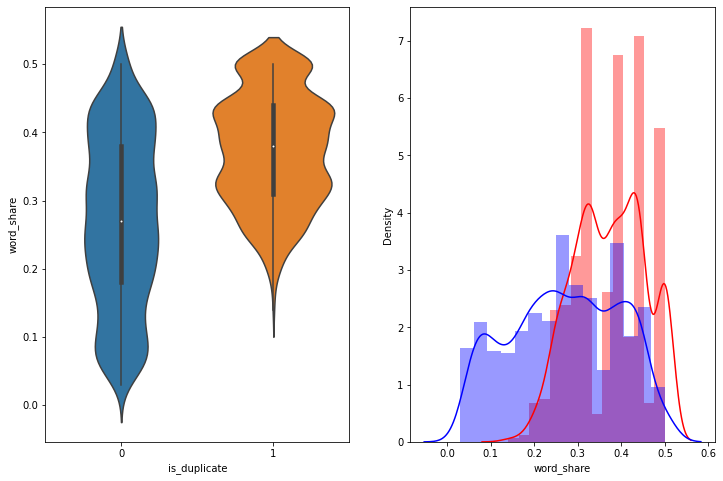

In [52]:
#plot for feature word share
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = new_df[0:])

plt.subplot(1,2,2)
sns.distplot(new_df[new_df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(new_df[new_df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

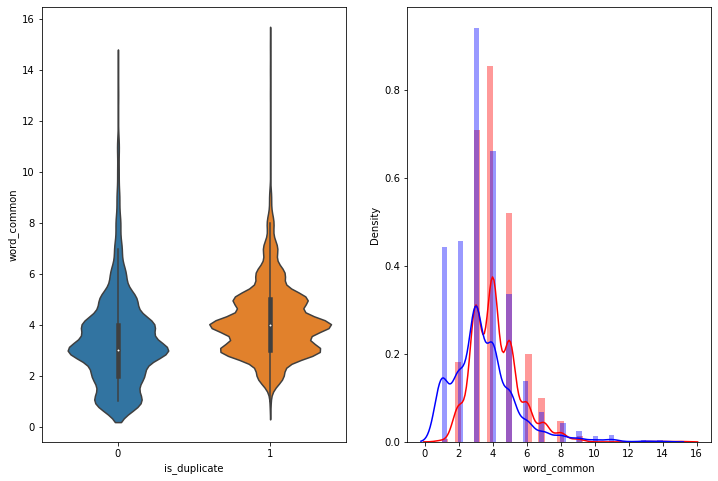

In [53]:
#plot for feature common word
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_common', data = new_df[0:])

plt.subplot(1,2,2)
sns.distplot(new_df[new_df['is_duplicate'] == 1.0]['word_common'][0:] , label = "1", color = 'red')
sns.distplot(new_df[new_df['is_duplicate'] == 0.0]['word_common'][0:] , label = "0" , color = 'blue' )
plt.show()

In [54]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [55]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [56]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1,55,56,10,10,...,18,0.44,0.874989,0.874989,0.0,0.0,0.874989,0.874989,1.0,1.0
115086,115086,187729,187730,poor want invest,quite poor want rich,0,18,22,5,6,...,9,0.33,0.666644,0.499988,0.0,0.0,0.666644,0.499988,0.0,0.0
327711,327711,454161,454162,india live abroad meet guy france party want...,e thapar university thapar university instit...,0,51,92,11,13,...,20,0.05,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0,35,76,8,14,...,20,0.05,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,32,34,6,7,...,11,0.36,0.749981,0.599988,0.0,0.0,0.749981,0.599988,1.0,0.0


In [57]:
!pip install distance

In [58]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [59]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [60]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1,55,56,10,10,...,0.874989,0.0,0.0,0.874989,0.874989,1.0,1.0,0.0,8.0,0.839286
115086,115086,187729,187730,poor want invest,quite poor want rich,0,18,22,5,6,...,0.499988,0.0,0.0,0.666644,0.499988,0.0,0.0,1.0,3.5,0.578947
327711,327711,454161,454162,india live abroad meet guy france party want...,e thapar university thapar university instit...,0,51,92,11,13,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,2.0,10.0,0.057692
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0,35,76,8,14,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,6.0,9.0,0.055556
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,32,34,6,7,...,0.599988,0.0,0.0,0.749981,0.599988,1.0,0.0,1.0,4.5,0.575758


In [61]:
!pip install fuzzywuzzy

In [62]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [63]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [64]:
print(new_df.shape)
new_df.head()

(3000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1,55,56,10,10,...,0.874989,1.0,1.0,0.0,8.0,0.839286,99,98,99,99
115086,115086,187729,187730,poor want invest,quite poor want rich,0,18,22,5,6,...,0.499988,0.0,0.0,1.0,3.5,0.578947,61,73,50,72
327711,327711,454161,454162,india live abroad meet guy france party want...,e thapar university thapar university instit...,0,51,92,11,13,...,0.000000,0.0,0.0,2.0,10.0,0.057692,26,37,30,30
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0,35,76,8,14,...,0.000000,0.0,0.0,6.0,9.0,0.055556,17,34,24,24
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,32,34,6,7,...,0.599988,1.0,0.0,1.0,4.5,0.575758,74,74,58,75


In [65]:
#stop words

In [66]:
from os import path

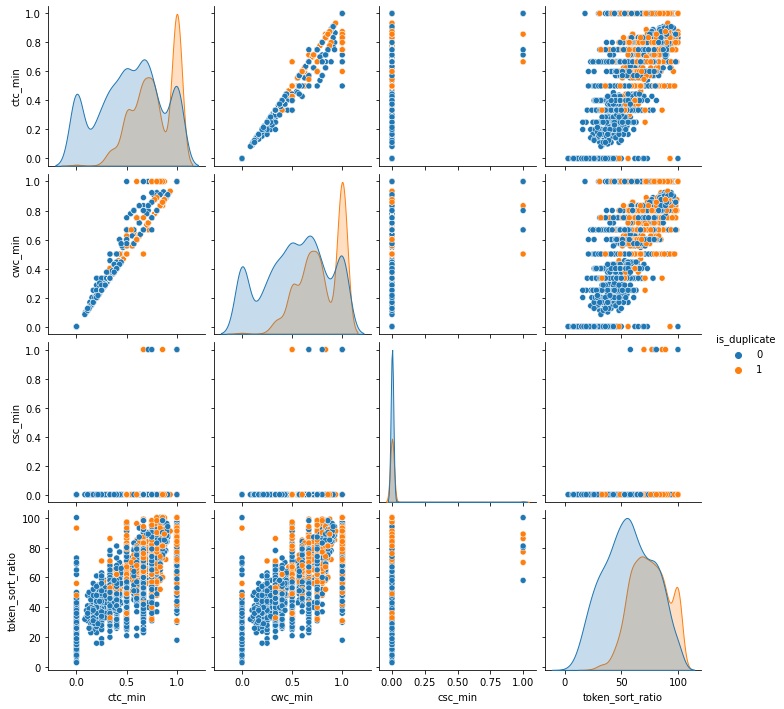

In [67]:
n = new_df.shape[0]
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

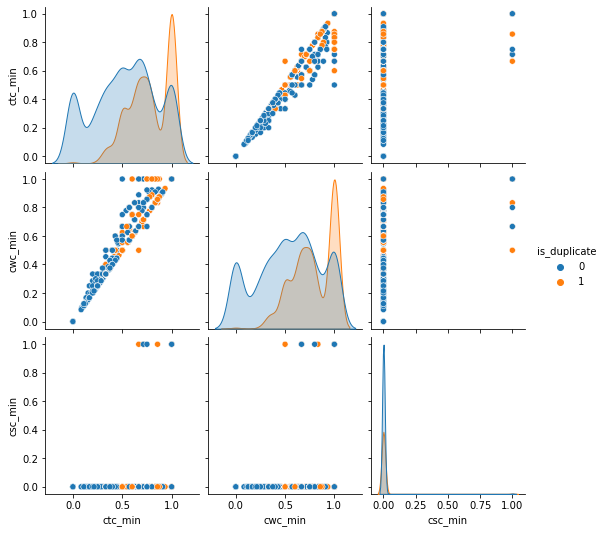

In [68]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

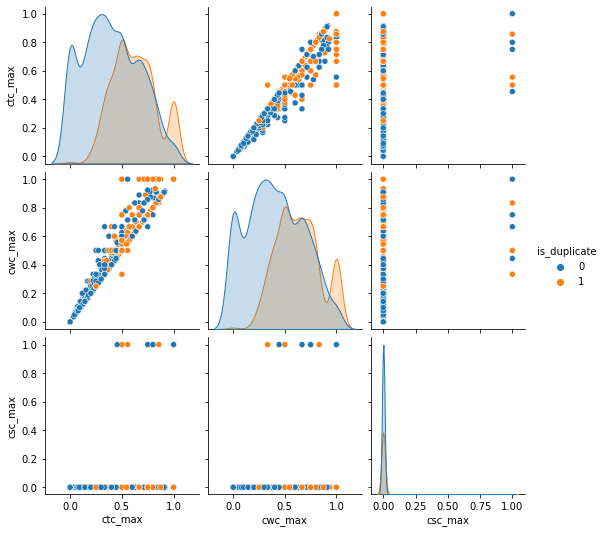

In [69]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

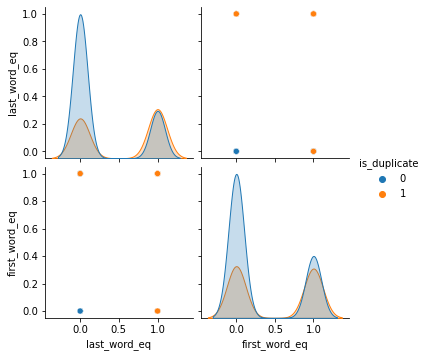

In [70]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

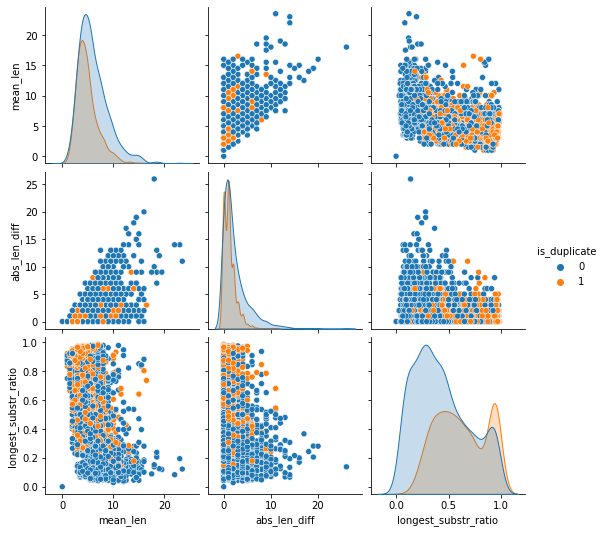

In [71]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

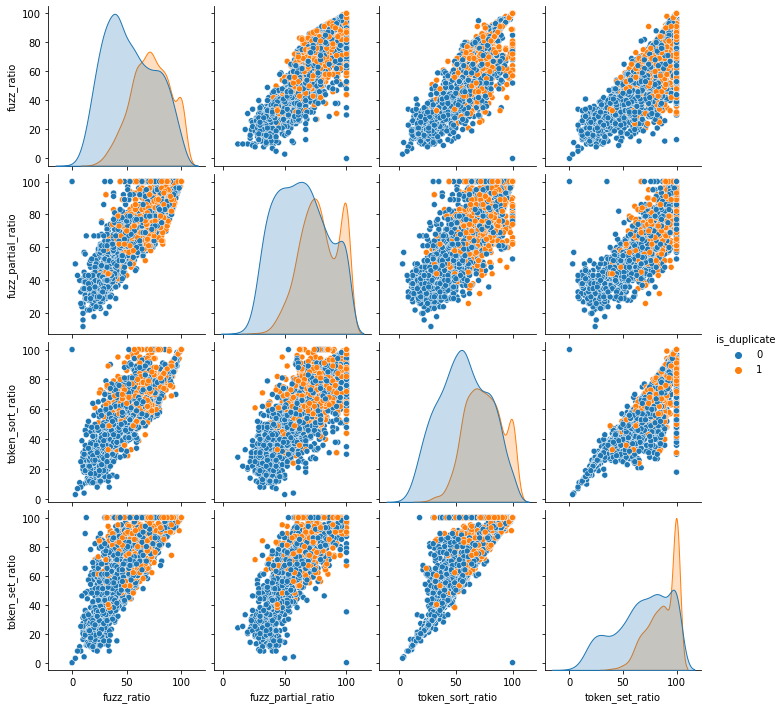

In [72]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

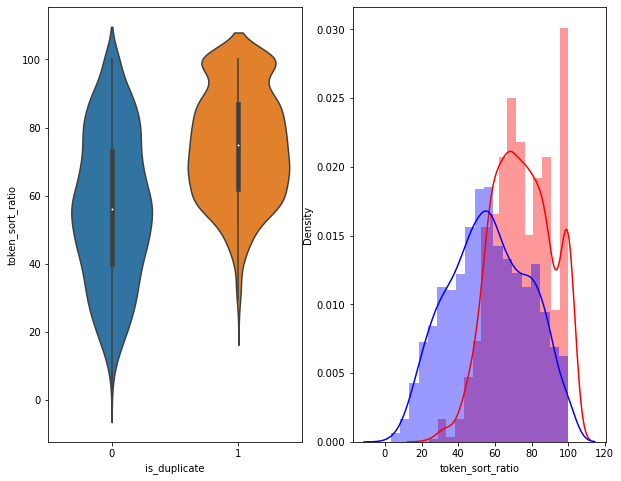

In [73]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = new_df[0:] , )

plt.subplot(1,2,2)
sns.distplot(new_df[new_df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(new_df[new_df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

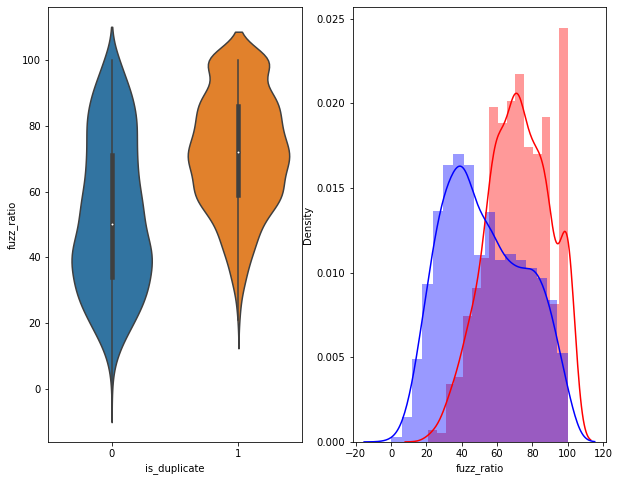

In [74]:
# Distribution of the fuzz_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = new_df[0:] , )

plt.subplot(1,2,2)
sns.distplot(new_df[new_df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(new_df[new_df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

In [75]:

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [76]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.047s...
[t-SNE] Computed neighbors for 3000 samples in 0.219s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.039010
[t-SNE] Computed conditional probabilities in 0.153s
[t-SNE] Iteration 50: error = 73.5859528, gradient norm = 0.0737103 (50 iterations in 1.561s)
[t-SNE] Iteration 100: error = 64.2802734, gradient norm = 0.0216956 (50 iterations in 1.049s)
[t-SNE] Iteration 150: error = 62.4736595, gradient norm = 0.0145787 (50 iterations in 1.035s)
[t-SNE] Iteration 200: error = 61.7219925, gradient norm = 0.0115044 (50 iterations in 1.047s)
[t-SNE] Iteration 250: error = 61.2739754, gradient norm = 0.0098106 (50 iterations in 1.043s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.273975
[t-SNE] Iteration 300: erro

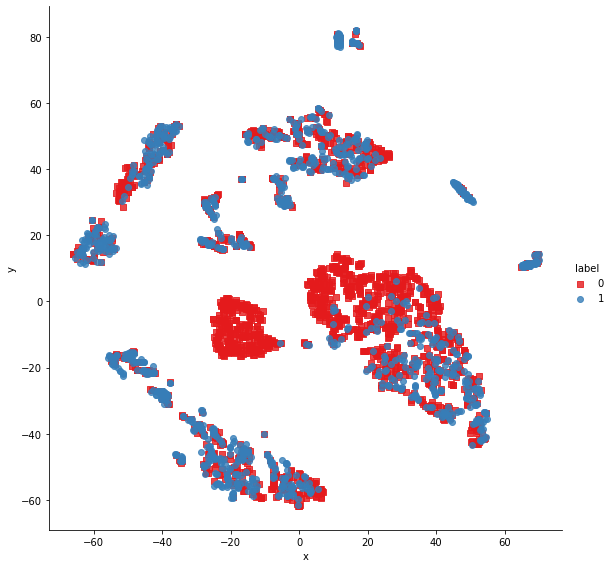

In [77]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

In [78]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.016s...
[t-SNE] Computed neighbors for 3000 samples in 0.203s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.039010
[t-SNE] Computed conditional probabilities in 0.150s
[t-SNE] Iteration 50: error = 71.9506989, gradient norm = 0.0357896 (50 iterations in 3.555s)
[t-SNE] Iteration 100: error = 62.8793755, gradient norm = 0.0095934 (50 iterations in 2.104s)
[t-SNE] Iteration 150: error = 61.6360855, gradient norm = 0.0049762 (50 iterations in 2.153s)
[t-SNE] Iteration 200: error = 61.0986671, gradient norm = 0.0026701 (50 iterations in 1.873s)
[t-SNE] Iteration 250: error = 60.7868805, gradient norm = 0.0019930 (50 iterations in 1.859s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.786880
[t-SNE] Iteration 300: erro

In [79]:
#import plotly.graph_objs as go
#import plotly.tools as tls
#import plotly.offline as py
#py.init_notebook_mode(connected=True)

#trace1 = go.Scatter3d(
 #   x=tsne3d[:,0],
  #  y=tsne3d[:,1],
   # z=tsne3d[:,2],
    #mode='markers',
    #marker=dict(
     #   sizemode='diameter',
      #  color = y,
       # colorscale = 'Portland',
        #colorbar = dict(title = 'duplicate'),
        #line=dict(color='rgb(255, 255, 255)'),
        #opacity=0.75
    #)
#)

#data=[trace1]
#layout=dict(height=800, width=800, title='3d embedding with engineered features')
#fig=dict(data=data, layout=layout)
#py.iplot(fig, filename='3DBubble')

In [80]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1,55,56,10,10,...,0.874989,1.0,1.0,0.0,8.0,0.839286,99,98,99,99
115086,115086,187729,187730,poor want invest,quite poor want rich,0,18,22,5,6,...,0.499988,0.0,0.0,1.0,3.5,0.578947,61,73,50,72
327711,327711,454161,454162,india live abroad meet guy france party want...,e thapar university thapar university instit...,0,51,92,11,13,...,0.000000,0.0,0.0,2.0,10.0,0.057692,26,37,30,30
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0,35,76,8,14,...,0.000000,0.0,0.0,6.0,9.0,0.055556,17,34,24,24
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,32,34,6,7,...,0.599988,1.0,0.0,1.0,4.5,0.575758,74,74,58,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230336,230336,339838,339839,codeblocks,codeblocks recognize include,0,12,30,3,5,...,0.333322,0.0,1.0,2.0,2.0,0.923077,53,100,53,100
75170,75170,128697,128698,ito integral represent brownian motion,ito integral important,0,40,24,7,5,...,0.399992,0.0,1.0,2.0,4.0,0.600000,53,79,53,71
259351,259351,375102,375103,get ignou mark sheet,address senior citizen customer e ticket irc...,0,22,60,6,10,...,0.000000,0.0,0.0,4.0,6.0,0.173913,21,36,26,26
273679,273679,374667,392177,would get uc berkeley please see question co...,take get uc berkeley,0,66,22,12,6,...,0.299997,0.0,0.0,6.0,7.0,0.695652,38,77,43,86


In [81]:
new_df_w2v=new_df

In [82]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...
115086,poor want invest,quite poor want rich
327711,india live abroad meet guy france party want...,e thapar university thapar university instit...
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy


In [83]:
new_df_w2v

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1,55,56,10,10,...,0.874989,1.0,1.0,0.0,8.0,0.839286,99,98,99,99
115086,115086,187729,187730,poor want invest,quite poor want rich,0,18,22,5,6,...,0.499988,0.0,0.0,1.0,3.5,0.578947,61,73,50,72
327711,327711,454161,454162,india live abroad meet guy france party want...,e thapar university thapar university instit...,0,51,92,11,13,...,0.000000,0.0,0.0,2.0,10.0,0.057692,26,37,30,30
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0,35,76,8,14,...,0.000000,0.0,0.0,6.0,9.0,0.055556,17,34,24,24
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,32,34,6,7,...,0.599988,1.0,0.0,1.0,4.5,0.575758,74,74,58,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230336,230336,339838,339839,codeblocks,codeblocks recognize include,0,12,30,3,5,...,0.333322,0.0,1.0,2.0,2.0,0.923077,53,100,53,100
75170,75170,128697,128698,ito integral represent brownian motion,ito integral important,0,40,24,7,5,...,0.399992,0.0,1.0,2.0,4.0,0.600000,53,79,53,71
259351,259351,375102,375103,get ignou mark sheet,address senior citizen customer e ticket irc...,0,22,60,6,10,...,0.000000,0.0,0.0,4.0,6.0,0.173913,21,36,26,26
273679,273679,374667,392177,would get uc berkeley please see question co...,take get uc berkeley,0,66,22,12,6,...,0.299997,0.0,0.0,6.0,7.0,0.695652,38,77,43,86


In [84]:
ques_df_bow=ques_df

In [85]:
ques_df_tfidf=ques_df

In [86]:
ques_df_w2v=ques_df

In [87]:
ques_df_glove=ques_df

In [88]:
ques_df_bert=ques_df

In [89]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(3000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,55,56,10,10,8,18,0.44,0.874989,0.874989,...,0.874989,1.0,1.0,0.0,8.0,0.839286,99,98,99,99
115086,0,18,22,5,6,3,9,0.33,0.666644,0.499988,...,0.499988,0.0,0.0,1.0,3.5,0.578947,61,73,50,72
327711,0,51,92,11,13,1,20,0.05,0.000000,0.000000,...,0.000000,0.0,0.0,2.0,10.0,0.057692,26,37,30,30
367788,0,35,76,8,14,1,20,0.05,0.000000,0.000000,...,0.000000,0.0,0.0,6.0,9.0,0.055556,17,34,24,24
151235,0,32,34,6,7,4,11,0.36,0.749981,0.599988,...,0.599988,1.0,0.0,1.0,4.5,0.575758,74,74,58,75


In [90]:
final_df_bow=final_df

In [91]:
final_df_bow.isnull().sum()

is_duplicate            0
q1_len                  0
q2_len                  0
q1_num_words            0
q2_num_words            0
word_common             0
word_total              0
word_share              0
cwc_min                 0
cwc_max                 0
csc_min                 0
csc_max                 0
ctc_min                 0
ctc_max                 0
last_word_eq            0
first_word_eq           0
abs_len_diff            0
mean_len                0
longest_substr_ratio    0
fuzz_ratio              0
fuzz_partial_ratio      0
token_sort_ratio        0
token_set_ratio         0
dtype: int64

In [92]:
final_df_tfidf=final_df

In [93]:
final_df_w2v=final_df

In [94]:
final_df_glove=final_df

In [95]:
final_df_bert=final_df

In [96]:
ques_df

,question1,question2
398782,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...
115086,poor want invest,quite poor want rich
327711,india live abroad meet guy france party want...,e thapar university thapar university instit...
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy
...,...,...
230336,codeblocks,codeblocks recognize include
75170,ito integral represent brownian motion,ito integral important
259351,get ignou mark sheet,address senior citizen customer e ticket irc...
273679,would get uc berkeley please see question co...,take get uc berkeley


In [97]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [98]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(3000, 6000)

In [99]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(3000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,55,56,10,10,8,18,0.44,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
115086,0,18,22,5,6,3,9,0.33,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
327711,0,51,92,11,13,1,20,0.05,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
367788,0,35,76,8,14,1,20,0.05,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
151235,0,32,34,6,7,4,11,0.36,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

# ML-FLow

In [101]:
import mlflow

In [102]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

In [103]:
mlflow.set_experiment("Quora Duplicate question detector")

<Experiment: artifact_location='./mlruns/1', creation_time=1665802965831, experiment_id='1', last_update_time=1666068293515, lifecycle_stage='active', name='Quora Duplicate question detector', tags={}>

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
#Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.725

In [107]:
#!pip install xgboost

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7283333333333334

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[327,  58],
       [107, 108]], dtype=int64)

In [111]:
# for random forest model
confusion_matrix(y_test,y_pred1)

array([[305,  80],
       [ 83, 132]], dtype=int64)

In [112]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [113]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [114]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [115]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [116]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [117]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [118]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [119]:
rf.predict(query_point_creator(q1,q4))

array([1], dtype=int64)

In [120]:
cv

CountVectorizer(max_features=3000)

In [121]:
import pickle

pickle.dump(rf,open('Model_new/model.pkl','wb'))
pickle.dump(cv,open('Model_new/cv.pkl','wb'))

# Tracking-Experiment-Logistic_regression

In [122]:
from sklearn import metrics

In [123]:
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "Logit")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    lr_classifier_bow = LogisticRegression(C=C)
    lr_classifier_bow.fit(X_train, y_train)
    y_pred = lr_classifier_bow.predict(X_test)
   
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier_bow, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/cv.pkl")

# Tracking-Experiment - Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "rf_bow")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_bow = RandomForestClassifier()
    rf_bow.fit(X_train,y_train)
    y_pred = rf_bow.predict(X_test)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_bow, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/cv.pkl")

# Tracking -Experiment -SVM

In [125]:
from sklearn.svm import SVC

In [126]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Sowjanya")
    mlflow.set_tag("algo", "SVM_bow")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier_bow = SVC(C=C)
    sv_classifier_bow.fit(X_train, y_train)
    y_pred = sv_classifier_bow.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier_bow, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/cv.pkl")

# TF-IDF

In [127]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...
115086,poor want invest,quite poor want rich
327711,india live abroad meet guy france party want...,e thapar university thapar university instit...
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy


In [128]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(3000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,55,56,10,10,8,18,0.44,0.874989,0.874989,...,0.874989,1.0,1.0,0.0,8.0,0.839286,99,98,99,99
115086,0,18,22,5,6,3,9,0.33,0.666644,0.499988,...,0.499988,0.0,0.0,1.0,3.5,0.578947,61,73,50,72
327711,0,51,92,11,13,1,20,0.05,0.000000,0.000000,...,0.000000,0.0,0.0,2.0,10.0,0.057692,26,37,30,30
367788,0,35,76,8,14,1,20,0.05,0.000000,0.000000,...,0.000000,0.0,0.0,6.0,9.0,0.055556,17,34,24,24
151235,0,32,34,6,7,4,11,0.36,0.749981,0.599988,...,0.599988,1.0,0.0,1.0,4.5,0.575758,74,74,58,75


In [129]:

questions = list(ques_df['question1']) + list(ques_df['question2'])



In [130]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(questions)

In [131]:
q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)

In [132]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(3000, 12918)

In [133]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(3000, 12941)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,6449,6450,6451,6452,6453,6454,6455,6456,6457,6458
398782,1,55,56,10,10,8,18,0.44,0.874989,0.874989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115086,0,18,22,5,6,3,9,0.33,0.666644,0.499988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327711,0,51,92,11,13,1,20,0.05,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367788,0,35,76,8,14,1,20,0.05,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151235,0,32,34,6,7,4,11,0.36,0.749981,0.599988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [135]:
pickle.dump(vectorizer,open('Model_new/vectorizer.pkl','wb'))

In [136]:
pd.DataFrame(dtm.toarray(), columns=sorted(vectorizer.vocabulary_))

,000,000rs,00am,01,03,10,100,100k,10k,10th,...,zurich,このたびはご愁傷さまでございます,不好意思,可以,啪啪啪啪,太好了vs,好萌阿,很好,港澳居民來往內地通行證,那年那兔那些事儿
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Experiment Tracking for TFIDF Logistic Regression

In [137]:
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "Logit_tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    lr_classifier_tfidf = LogisticRegression(C=C)
    lr_classifier_tfidf.fit(X_train, y_train)
    y_pred = lr_classifier_tfidf.predict(X_test)
   
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier_tfidf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/vectorizer.pkl")

# Experiment Tracking for TFIDF Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "rf_tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_tfidf = RandomForestClassifier()
    rf_tfidf.fit(X_train,y_train)
    y_pred = rf_tfidf.predict(X_test)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_tfidf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/vectorizer.pkl")

# Experiment Tracking for TFIDF SVM

In [139]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Sowjanya")
    mlflow.set_tag("algo", "SVM_tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier_tfidf = SVC(C=C)
    sv_classifier_tfidf.fit(X_train, y_train)
    y_pred = sv_classifier_tfidf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier_tfidf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/vectorizer.pkl")

# Word2Vec

In [140]:
! pip install gensim
! pip install --upgrade gensim

In [141]:
import gensim

print(gensim.__version__)

4.2.0


In [142]:
from gensim.models import Word2Vec

# BERT

In [143]:
#! pip install -U sentence-transformers

In [144]:
from sentence_transformers import SentenceTransformer, util
#model = SentenceTransformer('roberta-large-nli-stsb-mean-tokens')
model = SentenceTransformer('all-MiniLM-L6-v2')

In [145]:
ques_df = new_df[['question1','question2','is_duplicate']]
ques_df.head()

,question1,question2,is_duplicate
398782,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1
115086,poor want invest,quite poor want rich,0
327711,india live abroad meet guy france party want...,e thapar university thapar university instit...,0
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0


In [146]:
ques_df.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

In [147]:
ques_df

,question1,question2,is_duplicate
398782,best marketing automation tool small mid siz...,best marketing automation tool small mid siz...,1
115086,poor want invest,quite poor want rich,0
327711,india live abroad meet guy france party want...,e thapar university thapar university instit...,0
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cry tell k...,0
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0
...,...,...,...
230336,codeblocks,codeblocks recognize include,0
75170,ito integral represent brownian motion,ito integral important,0
259351,get ignou mark sheet,address senior citizen customer e ticket irc...,0
273679,would get uc berkeley please see question co...,take get uc berkeley,0


In [148]:
ques_df['questions'] = (ques_df['question1']) + (ques_df['question2'])

In [149]:
ques_df=ques_df.drop(columns=['question1','question2'])

In [150]:
ques_df.isnull().sum()

is_duplicate    0
questions       0
dtype: int64

In [151]:
y = ques_df['is_duplicate']
X = ques_df[['questions']]

In [152]:
y.value_counts()

0    1882
1    1118
Name: is_duplicate, dtype: int64

# Handling unbalanced data

In [153]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

In [165]:
y_ros.value_counts()

1    1882
0    1882
Name: is_duplicate, dtype: int64

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.2,random_state=1)

In [155]:
X_train['doc_vector_pretrained_bert'] = X_train.questions.apply(model.encode)

In [156]:
X_train_bert_pretrained = list(X_train.doc_vector_pretrained_bert)

In [157]:
X_test['doc_vector_pretrained_bert'] = X_test.questions.apply(model.encode)

In [158]:
X_test_bert_pretrained = list(X_test.doc_vector_pretrained_bert)

In [159]:
pip install keras

In [160]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [161]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.utils import pad_sequences

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.2,random_state=1)

In [169]:
y_train

2170    0
2745    1
2259    1
3518    1
586     0
       ..
2763    0
905     1
1096    0
235     1
1061    1
Name: is_duplicate, Length: 3011, dtype: int64

# Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier1 = LogisticRegression()
classifier1.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier1.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.701195219123506
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       387
           1       0.69      0.71      0.70       366

    accuracy                           0.70       753
   macro avg       0.70      0.70      0.70       753
weighted avg       0.70      0.70      0.70       753



# Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.7158034528552457
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       387
           1       0.67      0.83      0.74       366

    accuracy                           0.72       753
   macro avg       0.73      0.72      0.71       753
weighted avg       0.73      0.72      0.71       753



# Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8207171314741036
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       387
           1       0.86      0.75      0.80       366

    accuracy                           0.82       753
   macro avg       0.83      0.82      0.82       753
weighted avg       0.83      0.82      0.82       753



In [178]:
pretrained_bert_embeddings = np.array(X_train['doc_vector_pretrained_bert'].tolist())

pretrained_bert_embeddings.shape

KeyError: 'doc_vector_pretrained_bert'

In [ ]:
labels = y_train.apply(lambda x : 1 if x==1 else 0)

len(labels)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_bert_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

In [ ]:
from pickle import dump

In [ ]:
dump(classifier1, open('Model_new/logistic_bert.pkl','wb'))
dump(model, open('Model_new/model_bert.pkl', 'wb'))

In [ ]:
from pickle import load

In [ ]:
def predict(tweet):
    
    vocab = load(open('Model_new/model_bert.pkl','rb'))
    classifier1 = load(open('Model_new/logistic_bert.pkl','rb'))
    
   
    
    clean_tweet_vector = vocab.encode([tweet])
    
    print(clean_tweet_vector)
    prediction = classifier1.predict(clean_tweet_vector)
    
    return prediction

In [ ]:
q1 = input('Enter the q1: ')
q2 = input('Enter the q2: ')
q1=preprocess(q1)
q2=preprocess(q2)
q=q1+q2

#print(q)
prediction = predict(q)
#if q=="hellohello":
    #prediction=1
print(prediction)
if prediction == 0:
    print('not duplicate')
else:
    print('duplicate')

print(prediction)

# Experiment Tracking for log regression Bert

In [179]:
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "Logit_bert")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    logistic_bert = LogisticRegression()
    logistic_bert.fit(X_train_bert_pretrained, y_train)
   
    y_test_pred = logistic_bert.predict(X_test_bert_pretrained)
   
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(logistic_bert, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/model_bert.pkl")

# Random forest Bert

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "rf_bert")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_bert = RandomForestClassifier()
    rf_bert.fit(X_train_bert_pretrained,y_train)
    y_pred = rf_bert.predict(X_test_bert_pretrained)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_bert, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/model_bert.pkl")

# XGBoost

In [181]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_bert_pretrained,y_train)
y_pred1 = xgb.predict(X_test_bert_pretrained)
accuracy_score(y_test,y_pred1)

0.795484727755644

# Experiment Tracking

In [182]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "xgboost_bert")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    xgboost_bert = XGBClassifier()
    xgboost_bert.fit(X_train_bert_pretrained,y_train)
    y_pred = xgboost_bert.predict(X_test_bert_pretrained)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(xgboost_bert, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/model_bert.pkl")

In [183]:
confusion_matrix(y_test,y_pred1)

array([[300,  87],
       [ 67, 299]], dtype=int64)

In [184]:
cm=confusion_matrix(y_test,y_pred1)

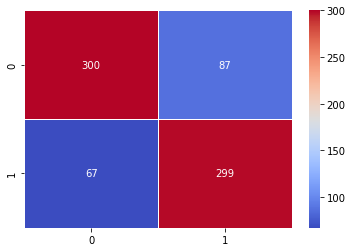

In [185]:
sns.heatmap(cm,cmap='coolwarm', annot=True,linewidth=1,fmt="d")
plt.show()

In [186]:
confusion_matrix(y_test,y_test_pred)

array([[269, 118],
       [107, 259]], dtype=int64)

In [187]:
cm1=confusion_matrix(y_test,y_test_pred)

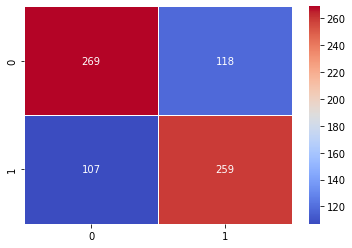

In [188]:
sns.heatmap(cm1,cmap='coolwarm', annot=True,linewidth=1,fmt="d")
plt.show()

# XGboost with hyperparameter tuning

In [189]:
import xgboost as xgb
param_grid = {"max_depth":[x for x in range(2,10)],
              "n_estimators":[50,100,150,200,300,400,500]}

In [190]:
from sklearn.model_selection import RandomizedSearchCV

In [191]:
model = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1,random_state=25), param_distributions=param_grid,n_iter=30,scoring='neg_log_loss',cv=3,n_jobs=-1)

In [ ]:
model.fit(X_train_bert_pretrained,y_train)

In [ ]:
model.best_params_

In [ ]:
clf=xgb.XGBClassifier(n_jobs=-1,random_state=25,max_depth=6,n_estimators=50)

In [ ]:
clf.fit(X_train_bert_pretrained,y_train)

In [ ]:
pickle.dump(clf,open('Model_new/clf_xgboost.pkl','wb'))
pickle.dump(model,open('Model_new/model_bert.pkl','wb'))

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [ ]:
y_pred_test=clf.predict_proba(X_test_bert_pretrained)
y_pred_train=clf.predict_proba(X_train_bert_pretrained)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

In [ ]:
#Experiment Tracking with Hyper parameter Tuning of XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "xgboost_bert_ht")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    #xgboost_bert = XGBClassifier()
    clf.fit(X_train_bert_pretrained,y_train)
    y_pred = clf.predict(X_test_bert_pretrained)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(clf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/model_bert.pkl")

# BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df_bow['question1']) + list(ques_df_bow['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
ques_df_bow.isnull().sum()

In [ ]:
temp_df1_basic = pd.DataFrame(q1_arr, index= ques_df_basic.index)
temp_df2_basic = pd.DataFrame(q2_arr, index= ques_df_basic.index)
temp_df_basic = pd.concat([temp_df1_basic, temp_df2_basic], axis=1)
temp_df_basic.shape

In [ ]:
final_df = pd.concat([final_df, temp_df_basic], axis=1)
print(final_df.shape)
final_df.head()

In [ ]:
final_df.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
dump(clf, open('Model_new/xgboost_bow.pkl','wb'))
dump(cv, open('Model_new/model_bow.pkl', 'wb'))

In [ ]:
y_pred_test=clf.predict_proba(X_test)
y_pred_train=clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

# Experiment Tracking for XGBoost WIth best parameters using BOW

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "xgboost_bow_ht")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    #xgboost_bert = XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(clf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/model_bow.pkl")

# MLFlow for randomized searchcv

In [ ]:
# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    param_grid = {"max_depth":[x for x in range(2,5)],
              "n_estimators":[50,100,150]}
    model = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1,random_state=25), 
                               param_distributions=param_grid,n_iter=30,scoring='neg_log_loss',cv=3,n_jobs=-1)

   
    model.fit(X_train, y_train)
    
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

# TF_IDF

In [ ]:
questions = list(ques_df_tfidf['question1']) + list(ques_df_tfidf['question2'])

In [ ]:
q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1_basic = pd.DataFrame(q1_arr_basic, index= ques_df_basic.index)
temp_df2_basic = pd.DataFrame(q2_arr_basic, index= ques_df_basic.index)
temp_df_basic = pd.concat([temp_df1_basic, temp_df2_basic], axis=1)
temp_df_basic.shape

In [ ]:
final_df = pd.concat([final_df, temp_df_basic], axis=1)
print(final_df.shape)
final_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_pred_test=clf.predict_proba(X_test)
y_pred_train=clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

In [ ]:
dump(clf, open('Model_new/xgboost_tfidf.pkl','wb'))
#dump(cv, open('Model_new/model_bow.pkl', 'wb'))

# Experiment Tracking XGBoost With best params for TFIDF

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "xgboost_tfidf_ht")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    #xgboost_bert = XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(clf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/vectorizer.pkl")

# WOrd2vec

In [ ]:
new_df_w_new = df.sample(3000,random_state=2)

In [ ]:
new_df_w2v['question1']=new_df_w_new['question1']

In [ ]:
new_df_w2v['question2']=new_df_w_new['question2']

In [ ]:
new_df_w2v.isnull().sum()

In [ ]:
def preprocess_w2v(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [ ]:
new_df_w2v['question1'] = new_df_w2v['question1'].apply(preprocess_w2v)
new_df_w2v['question2'] = new_df_w2v['question2'].apply(preprocess_w2v)

In [ ]:
ques_df_w2v = new_df_w2v[['question1','question2']]

In [ ]:
final_df_w2v = new_df_w2v.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df_w2v.shape)
final_df_w2v.head()

In [ ]:
questions_w2v = list(ques_df_w2v['question1']) + list(ques_df_w2v['question2'])

In [ ]:
questions_w2v=pd.DataFrame(questions_w2v)

In [ ]:
questions_w2v.columns=['questions']

In [ ]:
questions_w2v['questions'] = questions_w2v['questions'].apply(lambda sent : sent.split())

questions_w2v.head()

In [ ]:

model_w2v = Word2Vec(list(questions_w2v['questions']), vector_size=100, min_count=1)

In [ ]:
def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [ ]:
questions_w2v['doc_vector'] = questions_w2v.questions.apply(lambda x : document_vector(x, model_w2v.wv))

In [ ]:
X_train_w2v = list(questions_w2v['doc_vector'])

In [ ]:
questions_w2v['is_duplicate'] = list(new_df_w2v['is_duplicate']) + list(new_df_w2v['is_duplicate'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(questions_w2v['doc_vector'],questions_w2v['is_duplicate'],test_size=0.2,random_state=1)

In [ ]:
X_train_w2v = list(X_train)

In [ ]:
X_test_w2v = list(X_test)

In [ ]:
w2v_embeddings = np.array(X_train_w2v)

In [ ]:
labels = y_train.apply(lambda x : 1 if x=='is_duplicate' else 0)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(w2v_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000)

tsne_data = tsne.fit_transform(w2v_embeddings)

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
tsne_df["labels"] = labels

plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
plt.show()

In [ ]:
#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_w2v, y_train)

In [ ]:
y_test_pred = classifier.predict(X_test_w2v)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

# XGBoost after hyperparameter tuning

In [ ]:
clf.fit(X_train_w2v,y_train)

In [ ]:
y_pred_test=clf.predict_proba(X_test_w2v)
y_pred_train=clf.predict_proba(X_train_w2v)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

In [ ]:
pickle.dump(Word2Vec,open('Model_new/Word2Vec.pkl','wb'))

In [ ]:
pickle.dump(clf, open('Model_new/xgboost_w2v.pkl','wb'))

In [ ]:
#XGBoost with best parameters for w2v

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "xgboost_w2v_ht")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    #xgboost_bert = XGBClassifier()
    clf.fit(X_train_w2v,y_train)
    y_pred = clf.predict(X_test_w2v)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(clf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/Word2Vec.pkl")

# Experiment Tracking

# Logistic regression

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "Logit_w2v")
    #log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    classifier_w2v = LogisticRegression()
    classifier_w2v.fit(X_train_w2v, y_train)
   
    y_test_pred = classifier.predict(X_test_w2v)
   
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(classifier_w2v, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/Word2Vec.pkl")

# RF Experiment tracking

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "rf_w2v")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_w2v = RandomForestClassifier()
    rf_w2v.fit(X_train_w2v,y_train)
    y_pred = rf_w2v.predict(X_test_w2v)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_w2v, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/Word2Vec.pkl")

# SVM Experiment Tracking

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Sowjanya")
    mlflow.set_tag("algo", "SVM_w2v")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier_w2v = SVC(C=C)
    sv_classifier_w2v.fit(X_train_w2v, y_train)
    y_pred = sv_classifier_w2v.predict(X_test_w2v)
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier_w2v, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/Word2Vec.pkl")

# Glove

In [ ]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

In [ ]:
wv = api.load('glove-twitter-50')

In [ ]:
questions_w2v['doc_vector_pretrained_glove'] = questions_w2v.questions.apply(lambda x : document_vector(x, wv))

In [ ]:
X_train_glove_pretrained = list(questions_w2v['doc_vector_pretrained_glove'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(questions_w2v['doc_vector_pretrained_glove'],questions_w2v['is_duplicate'],test_size=0.2,random_state=1)

In [ ]:
X_train_glove_pretrained=list(X_train)

In [ ]:
X_test_glove_pretrained=list(X_test)

In [ ]:
pretrained_glove_embeddings = np.array(X_train_glove_pretrained)

In [ ]:
labels = y_train.apply(lambda x : 1 if x=='is_duplicate' else 0)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_glove_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

In [ ]:
SS

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_glove_pretrained, y_train)

In [ ]:
y_test_pred = classifier.predict(X_test_glove_pretrained)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

In [ ]:
pickle.dump(clf,open('Model_new/clf_xgboost.pkl','wb'))
pickle.dump(wv,open('Model_new/glove.pkl','wb'))

# Experiment Tracking

Logistic regression

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "Logit_glove")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    classifier_glove = LogisticRegression()
    classifier_glove.fit(X_train_glove_pretrained, y_train)
   
    y_test_pred = classifier_glove.predict(X_test_glove_pretrained)
   
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(classifier_glove, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/wv.pkl")

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "rf_glove")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_glove = RandomForestClassifier()
    rf_glove.fit(X_train_glove_pretrained,y_train)
    y_pred = rf_glove.predict(X_test_glove_pretrained)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_glove, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/wv.pkl")

SVM

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Sowjanya")
    mlflow.set_tag("algo", "SVM_glove")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier_glove = SVC(C=C)
    sv_classifier_glove.fit(X_train_glove_pretrained, y_train)
    y_pred = sv_classifier_glove.predict(X_test_glove_pretrained)
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier_glove, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/wv.pkl")

In [ ]:
#XGBoost with best params

In [ ]:
clf.fit(X_train_glove_pretrained,y_train)

In [ ]:
y_pred_test=clf.predict_proba(X_test_glove_pretrained)
y_pred_train=clf.predict_proba(X_train_glove_pretrained)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

In [ ]:
#Experiment tracking XGBoost Glove with best params

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "SOwjanya")
    mlflow.set_tag("algo", "xgboost_glove_ht")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    #xgboost_bert = XGBClassifier()
    clf.fit(X_train_glove_pretrained,y_train)
    y_pred = clf.predict(X_test_glove_pretrained)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(clf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/glove.pkl")